# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
%matplotlib inline

from scipy.io import wavfile
from scipy import signal

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
#from keras.utils import np_utils
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.optimizers import RMSprop

import os

Using TensorFlow backend.


# Download Data

In [11]:
os.chdir("/content/datalab")
!mkdir datasets
os.chdir("datasets")

mkdir: cannot create directory ‘datasets’: File exists


In [12]:
ls -l

total 0


In [13]:
!git clone https://github.com/stephanendupont/TPAudio.git
os.chdir("TPAudio")

Cloning into 'TPAudio'...
remote: Counting objects: 48, done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 48 (delta 1), reused 47 (delta 0), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [15]:
ls -l

total 8
drwxr-xr-x 4 root root 4096 May 22 08:13 HBB/
-rw-r--r-- 1 root root   10 May 22 08:13 README.md


In [16]:
import IPython.display as audioplay
audioplay.Audio("HBB/wav/davox_a_rhythm_fast_1_podcaster.wav")

In [17]:
!more HBB/lab/davox_a_rhythm_fast_1_podcaster.lab


0.000000 0.335958 sil
0.335958 0.550000 kick
0.550000 0.818583 hihatclosed
0.818583 1.073417 rimshot
1.073417 1.342458 hihatclosed
1.342458 1.600500 kick
1.600500 1.862667 hihatclosed
1.862667 2.106500 rimshot
2.106500 2.389292 hihatclosed
2.389292 2.647792 kick
2.647792 2.914083 hihatclosed
2.914083 3.169833 rimshot
3.169833 3.447125 hihatclosed
3.447125 3.697375 kick
3.697375 3.965500 hihatclosed
3.965500 4.225375 rimshot
4.225375 4.498083 hihatclosed
4.498083 4.752917 kick
4.752917 5.031125 hihatclosed
5.031125 5.307500 rimshot
5.307500 5.529333 hihatclosed
5.529333 5.792021 sil


In [0]:
# File list
wav_filenames=['davox_a_rhythm_fast_1_podcaster',
'davox_a_rhythm_fast_2_podcaster',
'davox_a_rhythm_fast_3_podcaster',
'davox_a_rhythm_fast_4_podcaster',
'davox_a_rhythm_fast_5_podcaster',
'davox_a_rhythm_fast_6_podcaster',
'davox_a_rhythm_fast_7_podcaster',
'davox_a_rhythm_fast_8_podcaster',
'davox_a_rhythm_fast_9_podcaster',
'davox_a_rhythm_slow_1_podcaster',
'davox_a_rhythm_slow_2_podcaster',
'davox_a_rhythm_slow_3_podcaster',
'davox_a_rhythm_slow_4_podcaster',
'davox_a_rhythm_slow_5_podcaster',
'davox_a_rhythm_slow_6_podcaster',
'davox_a_rhythm_slow_7_podcaster',
'davox_a_rhythm_slow_8_podcaster',
'davox_a_rhythm_slow_9_podcaster',
]


# Audio Analysis

In [0]:
# Which file
wav_id = 0;

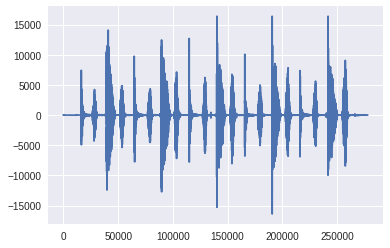

In [20]:
# Load sound
wav_filename = 'HBB/wav/'+wav_filenames[wav_id]+'.wav';
wav_fs, wav_sam = wavfile.read(wav_filename)

plt.plot(wav_sam)

(1025, 270)


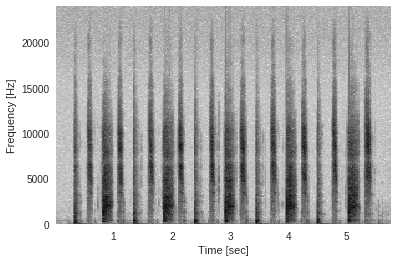

In [21]:
# Synchronous audio analysis (window, FFT, ...)
# wav_S est un empilement de spectres complexes
# F les frÈquences des diffÈrents bins de FFT
# S les instants auquels le signal est analysÈ par une FFT
wav_nfft = 2048;
wav_win = signal.get_window('hamming',wav_nfft);
F, T, wav_S = signal.spectrogram(wav_sam, wav_fs, wav_win, wav_nfft, wav_nfft/2)
print (wav_S.shape)
wav_SA = abs(wav_S);
wav_SdB = 20*np.log10(wav_SA);

plt.pcolormesh(T, F, wav_SdB)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [0]:
# Amplitude
wav_A = []
for cc in range(0, len(T)):
    sam1 = int(round(T[cc]*wav_fs) - wav_nfft/4);
    sam2 = int(round(T[cc]*wav_fs) + wav_nfft/4);
    wav_A.append(max(wav_sam[sam1:sam2]));

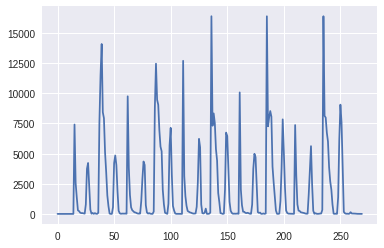

In [23]:
plt.plot(wav_A)

In [25]:
# Load ground truth labels
lab_filename = 'HBB/lab/'+wav_filenames[wav_id]+'.lab';
print(lab_filename)
fid = open(lab_filename,'r');
lab_all = np.genfromtxt(fid,
           delimiter=' ',
           dtype={'names': ('col1', 'col2', 'col3'),
           'formats': ('float', 'float', 'S20')})
fid.close()

HBB/lab/davox_a_rhythm_fast_1_podcaster.lab


In [26]:
lab_all

array([(0.      , 0.335958, b'sil'), (0.335958, 0.55    , b'kick'),
       (0.55    , 0.818583, b'hihatclosed'),
       (0.818583, 1.073417, b'rimshot'),
       (1.073417, 1.342458, b'hihatclosed'),
       (1.342458, 1.6005  , b'kick'),
       (1.6005  , 1.862667, b'hihatclosed'),
       (1.862667, 2.1065  , b'rimshot'),
       (2.1065  , 2.389292, b'hihatclosed'),
       (2.389292, 2.647792, b'kick'),
       (2.647792, 2.914083, b'hihatclosed'),
       (2.914083, 3.169833, b'rimshot'),
       (3.169833, 3.447125, b'hihatclosed'),
       (3.447125, 3.697375, b'kick'),
       (3.697375, 3.9655  , b'hihatclosed'),
       (3.9655  , 4.225375, b'rimshot'),
       (4.225375, 4.498083, b'hihatclosed'),
       (4.498083, 4.752917, b'kick'),
       (4.752917, 5.031125, b'hihatclosed'),
       (5.031125, 5.3075  , b'rimshot'),
       (5.3075  , 5.529333, b'hihatclosed'), (5.529333, 5.792021, b'sil')],
      dtype=[('col1', '<f8'), ('col2', '<f8'), ('col3', 'S20')])

In [0]:
# Convert map
lab_map = {}
lab_map['garbage'] = 0;
lab_map['hihatclosed'] = 1;
lab_map['hihatopened'] = 1;
lab_map['inhalation'] = 0;
lab_map['inhalation_noise'] = 0;
lab_map['kick'] = 1;
lab_map['rimshot'] = 1;
lab_map['sil'] = 0;
lab_map['snare'] = 1;

In [0]:
# Convert labels to numerical values synchronous with audio analysis
lab_array = [0] * len(wav_A)
for cc in range(0, len(lab_all)):
    pos = int(max(0,round(lab_all[cc][0]*wav_fs/(wav_nfft/2))))
    lab_array[pos] =  lab_map[lab_all[cc][2].decode("utf-8")]

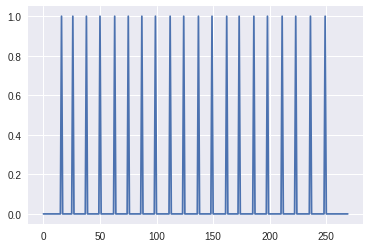

In [29]:
plt.plot(lab_array)

# All Data

In [30]:
wav_SdB_all = []
wav_A_all = []
lab_array_all = []
    
for count in range(0, 18):

    wav_id = count
    
    # Load sound
    wav_filename = 'HBB/wav/'+wav_filenames[wav_id]+'.wav';
    wav_fs, wav_sam = wavfile.read(wav_filename)

    # Synchronous audio analysis (window, FFT, ...)
    wav_nfft = 2048;
    wav_win = signal.get_window('hamming',wav_nfft);
    F, T, wav_S = signal.spectrogram(wav_sam, wav_fs, wav_win, wav_nfft, wav_nfft/2)
    print (wav_S.shape)
    wav_SA = abs(wav_S);
    wav_SdB = 20*np.log10(wav_SA)

    # Amplitude
    wav_A = []
    for ccc in range(0, len(T)):
        sam1 = int(round(T[cc]*wav_fs) - wav_nfft/4)
        sam2 = int(round(T[cc]*wav_fs) + wav_nfft/4)
        wav_A.append(max(wav_sam[sam1:sam2]))

    # Cat
    if count == 0:
        wav_SdB_all = wav_SdB
        wav_A_all = wav_A
    else:
        wav_SdB_all = np.concatenate((wav_SdB_all,wav_SdB),axis=1)
        wav_A_all = np.concatenate((wav_A_all,wav_A),axis=0)

    # Load ground truth labels
    lab_filename = 'HBB/lab/'+wav_filenames[wav_id]+'.lab'
    print(lab_filename)
    fid = open(lab_filename,'r')
    lab_all = np.genfromtxt(fid,
           delimiter=' ',
           dtype={'names': ('col1', 'col2', 'col3'),
           'formats': ('float', 'float', 'S20')})
    fid.close()

    # Convert labels to numerical values synchronous with audio analysis
    lab_array = [0] * len(wav_A)
    for cc in range(0, len(lab_all)):
        pos = int(max(0,round(lab_all[cc][0]*wav_fs/(wav_nfft/2))))
        lab_array[pos] =  lab_map[lab_all[cc][2].decode("utf-8")]

    # Cat
    if count == 0:
        lab_array_all = lab_array
    else:
        lab_array_all = np.concatenate((lab_array_all,lab_array),axis=0)


(1025, 270)
HBB/lab/davox_a_rhythm_fast_1_podcaster.lab
(1025, 395)
HBB/lab/davox_a_rhythm_fast_2_podcaster.lab
(1025, 365)
HBB/lab/davox_a_rhythm_fast_3_podcaster.lab
(1025, 371)
HBB/lab/davox_a_rhythm_fast_4_podcaster.lab
(1025, 303)
HBB/lab/davox_a_rhythm_fast_5_podcaster.lab
(1025, 360)
HBB/lab/davox_a_rhythm_fast_6_podcaster.lab
(1025, 360)
HBB/lab/davox_a_rhythm_fast_7_podcaster.lab
(1025, 365)
HBB/lab/davox_a_rhythm_fast_8_podcaster.lab
(1025, 521)
HBB/lab/davox_a_rhythm_fast_9_podcaster.lab
(1025, 401)
HBB/lab/davox_a_rhythm_slow_1_podcaster.lab
(1025, 511)
HBB/lab/davox_a_rhythm_slow_2_podcaster.lab
(1025, 455)
HBB/lab/davox_a_rhythm_slow_3_podcaster.lab
(1025, 518)
HBB/lab/davox_a_rhythm_slow_4_podcaster.lab
(1025, 419)
HBB/lab/davox_a_rhythm_slow_5_podcaster.lab
(1025, 526)
HBB/lab/davox_a_rhythm_slow_6_podcaster.lab
(1025, 451)
HBB/lab/davox_a_rhythm_slow_7_podcaster.lab
(1025, 481)
HBB/lab/davox_a_rhythm_slow_8_podcaster.lab
(1025, 607)
HBB/lab/davox_a_rhythm_slow_9_podcas

In [31]:
wav_A_all.shape

(7679,)

# Machine Learning

In [0]:
#Compute feature vector based on amplitude
x_train = np.zeros((len(wav_A_all),2))
x_train.shape
x_train[:,0]=wav_A_all
x_train[1:len(wav_A_all),1]=wav_A_all[0:len(wav_A_all)-1]

In [0]:
#Some normalisation
x_train_mean = np.mean(wav_A_all)
x_train_std = np.std(wav_A_all)
x_train = (x_train-x_train_mean)/x_train_std

In [0]:
y_train = lab_array_all

In [0]:
num_classes = 2
#Some format change
y_train = keras.utils.to_categorical(y_train, num_classes)

## Fully-Connected DNN

https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [0]:
batch_size = 32
epochs = 20
size_l1 = 32
size_l2 = 32

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
#from keras.utils import np_utils
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.optimizers import RMSprop

In [0]:
model = Sequential()
model.add(Dense(size_l1, activation='relu', input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(size_l2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,218
Trainable params: 1,218
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [42]:
# Training: note there is something wrong here as we validate on the training data
#           validation should be done on held-out data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_train, y_train))

Train on 7679 samples, validate on 7679 samples
Epoch 1/20
7679/7679 [==============================] - 3s 352us/step - loss: 0.3455 - acc: 0.9182 - val_loss: 0.2617 - val_acc: 0.9280
Epoch 2/20
7679/7679 [==============================] - 2s 255us/step - loss: 0.2695 - acc: 0.9279 - val_loss: 0.2589 - val_acc: 0.9280
Epoch 3/20
7679/7679 [==============================] - 2s 254us/step - loss: 0.2671 - acc: 0.9280 - val_loss: 0.2582 - val_acc: 0.9280
Epoch 4/20
7679/7679 [==============================] - 2s 250us/step - loss: 0.2661 - acc: 0.9280 - val_loss: 0.2582 - val_acc: 0.9280
Epoch 5/20
7679/7679 [==============================] - 2s 252us/step - loss: 0.2628 - acc: 0.9280 - val_loss: 0.2585 - val_acc: 0.9280
Epoch 6/20
7679/7679 [==============================] - 2s 251us/step - loss: 0.2611 - acc: 0.9280 - val_loss: 0.2592 - val_acc: 0.9280
Epoch 7/20
4448/7679 [================>.............] - ETA: 0s - loss: 0.2539 - acc: 0.9323

7679/7679 [==============================] - 2s 254us/step - loss: 0.2633 - acc: 0.9280 - val_loss: 0.2609 - val_acc: 0.9280
Epoch 8/20
7679/7679 [==============================] - 2s 254us/step - loss: 0.2641 - acc: 0.9280 - val_loss: 0.2591 - val_acc: 0.9280
Epoch 9/20
7679/7679 [==============================] - 2s 257us/step - loss: 0.2622 - acc: 0.9280 - val_loss: 0.2580 - val_acc: 0.9280
Epoch 10/20
7679/7679 [==============================] - 2s 250us/step - loss: 0.2614 - acc: 0.9280 - val_loss: 0.2586 - val_acc: 0.9280
Epoch 11/20
7679/7679 [==============================] - 2s 257us/step - loss: 0.2634 - acc: 0.9280 - val_loss: 0.2596 - val_acc: 0.9280
Epoch 12/20
7679/7679 [==============================] - 2s 258us/step - loss: 0.2620 - acc: 0.9280 - val_loss: 0.2585 - val_acc: 0.9280
Epoch 13/20
7392/7679 [===========================>..] - ETA: 0s - loss: 0.2601 - acc: 0.9284

7679/7679 [==============================] - 2s 255us/step - loss: 0.2614 - acc: 0.9280 - val_loss: 0.2588 - val_acc: 0.9280
Epoch 14/20
7679/7679 [==============================] - 2s 256us/step - loss: 0.2618 - acc: 0.9280 - val_loss: 0.2583 - val_acc: 0.9280
Epoch 15/20
7679/7679 [==============================] - 2s 253us/step - loss: 0.2613 - acc: 0.9280 - val_loss: 0.2590 - val_acc: 0.9280
Epoch 16/20
7679/7679 [==============================] - 2s 255us/step - loss: 0.2615 - acc: 0.9280 - val_loss: 0.2588 - val_acc: 0.9280
Epoch 17/20
7679/7679 [==============================] - 2s 256us/step - loss: 0.2628 - acc: 0.9280 - val_loss: 0.2608 - val_acc: 0.9280
Epoch 18/20
7679/7679 [==============================] - 2s 260us/step - loss: 0.2631 - acc: 0.9280 - val_loss: 0.2584 - val_acc: 0.9280
Epoch 19/20
7648/7679 [============================>.] - ETA: 0s - loss: 0.2631 - acc: 0.9281

7679/7679 [==============================] - 2s 259us/step - loss: 0.2634 - acc: 0.9280 - val_loss: 0.2582 - val_acc: 0.9280
Epoch 20/20
7679/7679 [==============================] - 2s 257us/step - loss: 0.2625 - acc: 0.9280 - val_loss: 0.2595 - val_acc: 0.9280


## CNN - Convolutional Neural Network

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

## RNN - Recurrent Neural Network (with initialisation)

https://github.com/keras-team/keras/blob/master/examples/mnist_irnn.py

## HRNN - Hierarchical Recurrent Neural Network

https://github.com/keras-team/keras/blob/master/examples/mnist_hierarchical_rnn.py